In [1]:
import seaborn as sns

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
                        .master("local[8]")\
                        .config('spark.executor.memory', '5g')\
                        .config('spark.driver.memory', '5g')\
                        .config('spark.local.dir','~/.spark_tmp/')\
                        .appName("Tweet wrangeling")\
                        .getOrCreate()

In [3]:
spark

# Eth

In [6]:
parquet_eth_path = "../data/tweets/ethereum/parquet/sentiment/"

In [7]:
eth = spark.read.parquet(parquet_eth_path)

In [8]:
eth.printSchema()

root
 |-- username: string (nullable = true)
 |-- datetime: timestamp (nullable = true)
 |-- text: string (nullable = true)
 |-- retweets: integer (nullable = true)
 |-- favorites: integer (nullable = true)
 |-- geo: string (nullable = true)
 |-- mentions: string (nullable = true)
 |-- hashtags: string (nullable = true)
 |-- id: string (nullable = true)
 |-- permalink: string (nullable = true)
 |-- pos_vader: float (nullable = true)
 |-- neg_vader: float (nullable = true)
 |-- neu_vader: float (nullable = true)
 |-- compound_vader: float (nullable = true)
 |-- polarity_textblob: float (nullable = true)
 |-- subjectivity_textblob: float (nullable = true)



In [9]:
eth.count()

4326320

In [10]:
eth.select("text").distinct().count()

3514005

In [11]:
from pyspark.sql.functions import to_date

In [12]:
date_counts = eth.withColumn("date",to_date("datetime")).groupBy("date").count()

In [13]:
date_counts_pd = date_counts.toPandas()

In [14]:
import matplotlib

<IPython.core.display.Javascript object>


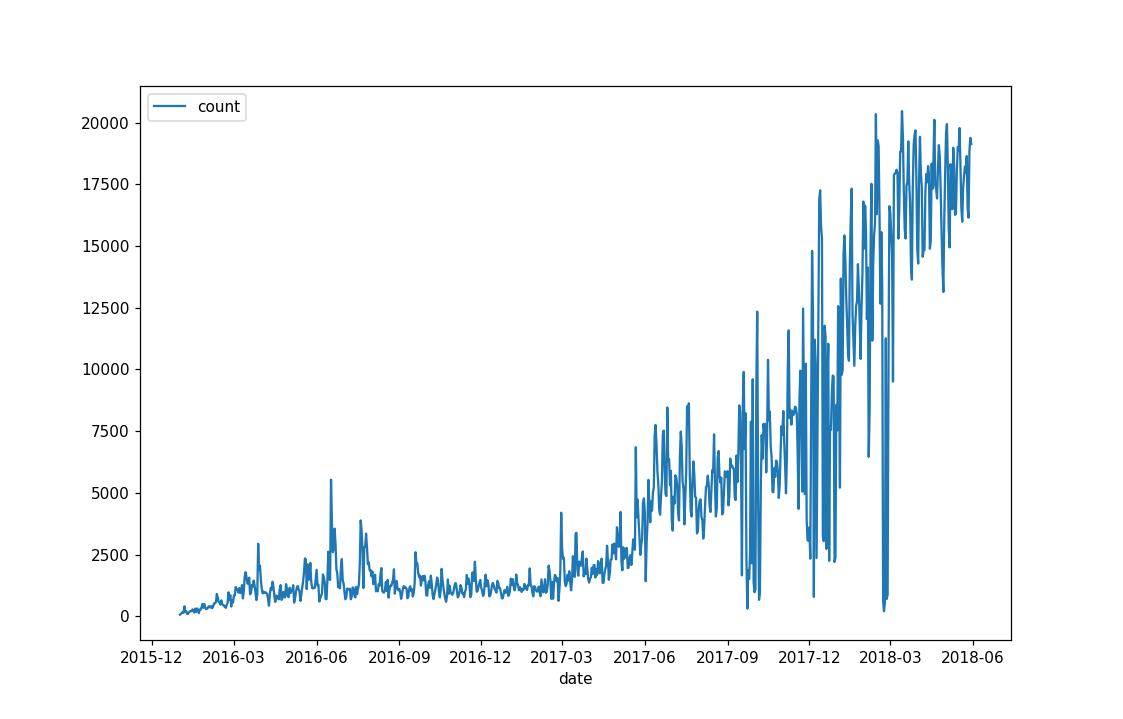

In [15]:
%matplotlib notebook
date_counts_pd.plot.line(x="date",y="count")

In [16]:
date_counts.filter("date > '2017-09' AND date < '2018-04' ").sort("count").show()

+----------+-----+
|      date|count|
+----------+-----+
|2018-02-22|  201|
|2017-09-23|  308|
|2018-02-23|  561|
|2018-02-21|  620|
|2017-10-06|  663|
|2018-02-25|  701|
|2017-12-06|  783|
|2018-02-26|  869|
|2017-10-01|  972|
|2017-10-07|  990|
|2017-10-02| 1096|
|2017-09-30| 1377|
|2017-09-25| 1507|
|2017-09-17| 1655|
|2017-09-24| 1853|
|2017-09-28| 2144|
|2017-12-29| 2197|
|2017-12-23| 2241|
|2017-12-02| 2331|
|2017-09-22| 2335|
+----------+-----+
only showing top 20 rows



In [14]:
date_counts.filter("date > '2017-09' AND date < '2018-04' ").filter("count < 2000").count()

15

# BTC

In [17]:
parquet_btc_path = "../data/tweets/bitcoin/parquet/sentiment/"

In [18]:
btc = spark.read.parquet(parquet_btc_path)

In [19]:
btc.printSchema()

root
 |-- username: string (nullable = true)
 |-- datetime: timestamp (nullable = true)
 |-- text: string (nullable = true)
 |-- retweets: integer (nullable = true)
 |-- favorites: integer (nullable = true)
 |-- geo: string (nullable = true)
 |-- mentions: string (nullable = true)
 |-- hashtags: string (nullable = true)
 |-- id: string (nullable = true)
 |-- permalink: string (nullable = true)
 |-- pos_vader: float (nullable = true)
 |-- neg_vader: float (nullable = true)
 |-- neu_vader: float (nullable = true)
 |-- compound_vader: float (nullable = true)
 |-- polarity_textblob: float (nullable = true)
 |-- subjectivity_textblob: float (nullable = true)



In [20]:
btc.count()

26208300

In [21]:
btc.distinct().count()

26208300

In [22]:
#btc.select("text").distinct().count()

In [23]:
17431338/20739466

0.8404911679018158

In [24]:
btc.distinct().count()

26208300

In [25]:
btc.limit(5).toPandas()

,username,datetime,text,retweets,favorites,geo,mentions,hashtags,id,permalink,pos_vader,neg_vader,neu_vader,compound_vader,polarity_textblob,subjectivity_textblob
0,RealJohnyRomero,2018-05-26 23:57:00,for the project that is used for bitcoin virtu...,0,1,None,None,None,1000526434698440712,https://twitter.com/RealJohnyRomero/status/100...,0.000,0.000,1.000,0.0000,0.000000,0.000000
1,de_erikita,2018-05-26 23:57:00,#ze_cash #ico https:// ze.cash Ze next Bitcoin...,0,0,None,None,#ze_cash #ico,1000526359175704578,https://twitter.com/de_erikita/status/10005263...,0.095,0.000,0.905,0.2960,0.000000,0.000000
2,theflyinghutch,2018-05-26 23:57:00,Joke: discussion describing the fallacies of b...,0,1,None,None,None,1000526279500877825,https://twitter.com/theflyinghutch/status/1000...,0.111,0.182,0.707,-0.3400,-0.200000,0.000000
3,beyazdiy,2018-05-26 23:54:00,"http:// bitcoinhaberleri.co Kripto para, kript...",0,0,None,None,None,1000525689802711042,https://twitter.com/beyazdiy/status/1000525689...,0.000,0.000,1.000,0.0000,0.000000,0.000000
4,AdegboyegaHeze4,2018-05-26 23:54:00,"Big airdrop Javatoken airdrop get 80,000 jtoke...",1,1,None,None,#TokenSa #ICO #bitcoin #ethereum #crypto #cryp...,1000525493911871488,https://twitter.com/AdegboyegaHeze4/status/100...,0.000,0.058,0.942,-0.2263,-0.035714,0.121429


In [26]:
from pyspark.sql.functions import to_date

In [27]:
date_counts_btc = btc.withColumn("date",to_date("datetime")).groupBy("date").count()

In [28]:
print("number of days that need to be reevaluated")
date_counts_btc.filter("count < 10000").sort("count").count()

number of days that need to be reevaluated


52

In [29]:
date_counts_btc.filter("count < 10000").sort("date").show(52)

+----------+-----+
|      date|count|
+----------+-----+
|2016-05-04| 1670|
|2016-07-03| 9516|
|2016-07-29| 9690|
|2016-07-31| 2357|
|2016-08-03| 1292|
|2016-08-07| 7095|
|2016-08-08| 8627|
|2016-08-13| 9854|
|2016-08-14| 1841|
|2016-08-16| 3681|
|2016-08-17| 2157|
|2016-08-18| 6904|
|2016-08-20| 4076|
|2016-09-13| 2662|
|2016-09-15|   13|
|2016-09-23| 1083|
|2016-09-24| 7887|
|2016-09-28| 9587|
|2016-09-29| 2307|
|2016-10-01|   16|
|2016-10-02| 2386|
|2016-10-03| 7661|
|2016-10-15| 2162|
|2016-10-16| 1831|
|2016-10-17| 1767|
|2016-10-18| 1351|
|2016-10-19|  461|
|2016-10-20|    8|
|2016-10-21| 2992|
|2016-10-22| 2209|
|2017-01-09|  854|
|2017-03-19| 3456|
|2017-03-20| 4730|
|2017-03-21|  533|
|2017-03-25| 4963|
|2017-03-26|   54|
|2017-04-20| 7158|
|2017-07-18| 7208|
|2017-10-06| 4145|
|2017-10-07| 3381|
|2017-10-29| 7549|
|2017-12-10| 7080|
|2018-02-25| 2577|
|2018-02-26| 4476|
|2018-03-04| 7394|
|2018-03-26| 2598|
|2018-04-19| 3130|
|2018-04-26| 7045|
|2018-05-09| 8469|
|2018-05-10|

In [30]:
date_counts_btc.filter("date == '2016-08-30'").show()

+----------+-----+
|      date|count|
+----------+-----+
|2016-08-30|17259|
+----------+-----+



In [31]:
date_counts_btc_pd = date_counts_btc.toPandas()

In [32]:
import matplotlib

<IPython.core.display.Javascript object>


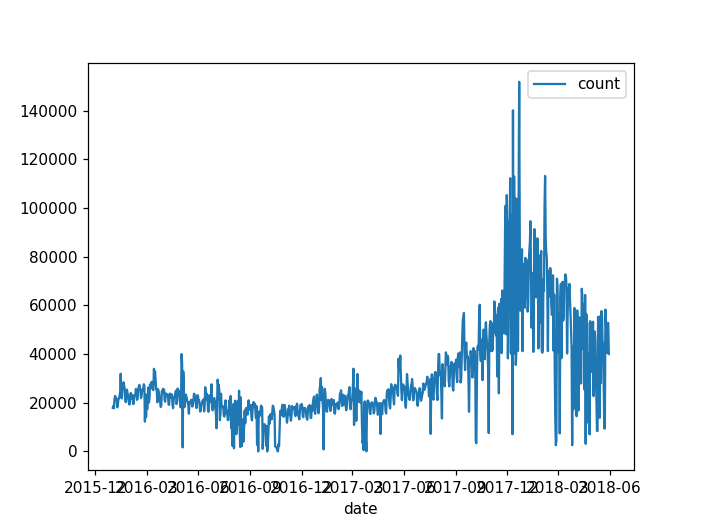

In [33]:
%matplotlib notebook
date_counts_btc_pd.plot.line(x="date",y="count")

## Group By Month

In [34]:
btc.printSchema()

root
 |-- username: string (nullable = true)
 |-- datetime: timestamp (nullable = true)
 |-- text: string (nullable = true)
 |-- retweets: integer (nullable = true)
 |-- favorites: integer (nullable = true)
 |-- geo: string (nullable = true)
 |-- mentions: string (nullable = true)
 |-- hashtags: string (nullable = true)
 |-- id: string (nullable = true)
 |-- permalink: string (nullable = true)
 |-- pos_vader: float (nullable = true)
 |-- neg_vader: float (nullable = true)
 |-- neu_vader: float (nullable = true)
 |-- compound_vader: float (nullable = true)
 |-- polarity_textblob: float (nullable = true)
 |-- subjectivity_textblob: float (nullable = true)



In [35]:
from pyspark.sql.functions import month, year, sum
month_year_counts = btc.withColumn("date",to_date("datetime"))\
                            .groupBy(month('date').alias('month'),year('date').alias('year')).count()\
                            .sort('year','month')\
                            .toPandas()

In [36]:
btc.count()

26208300

In [37]:
btc.withColumn("date",to_date("datetime"))\
                            .groupBy(month('date').alias('month'),year('date').alias('year')).count()\
                            .select(sum('count')).show()

+----------+
|sum(count)|
+----------+
|  26208300|
+----------+



<IPython.core.display.Javascript object>


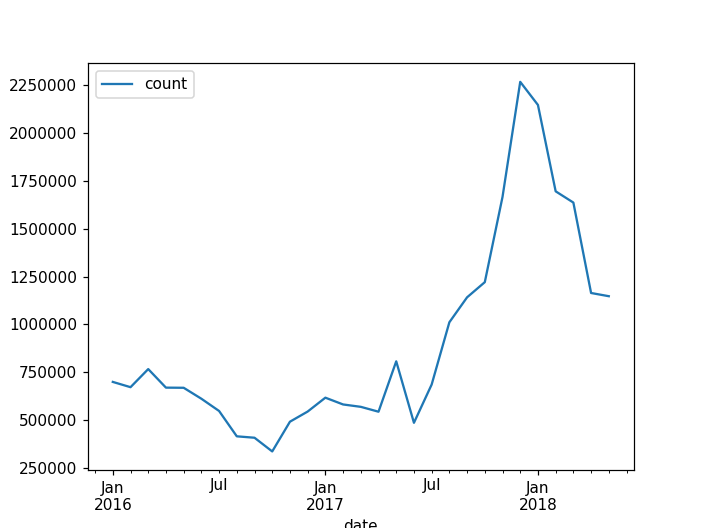

In [38]:
import pandas as pd
num_records= len(month_year_counts.year)
date_dic = dict(year=month_year_counts.year, month=month_year_counts.month, day=[1]*num_records)

month_year_counts['date'] = pd.to_datetime(date_dic,format='%Y%m%d')
month_year_counts.drop(['month','year'],axis=1).set_index(["date"]).plot(kind='line')